In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data = pd.read_csv("./Car_sales (1).csv")
data.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
data.shape

(157, 16)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [6]:
data.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

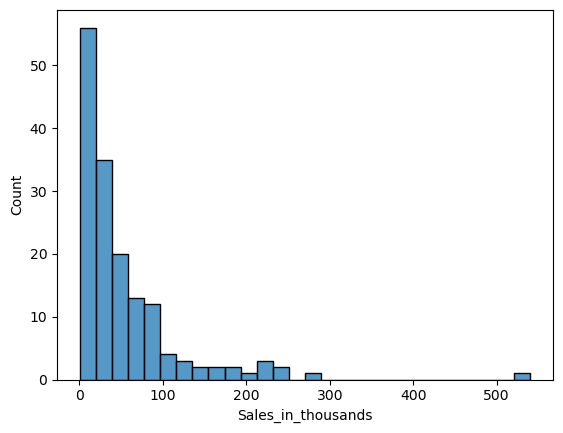

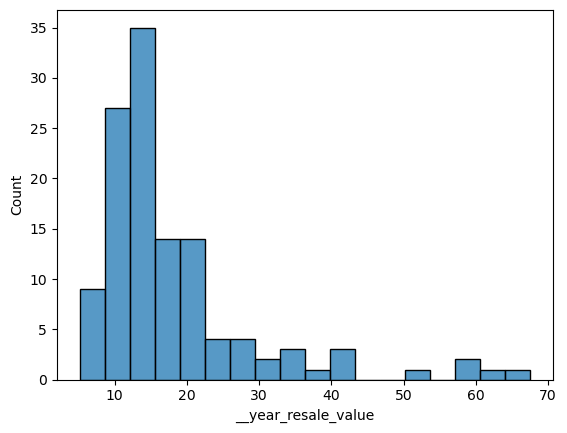

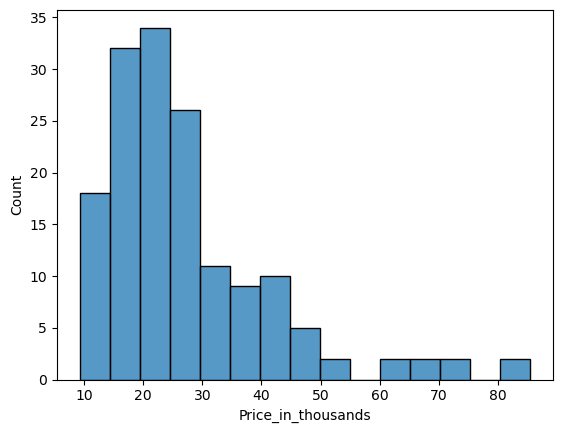

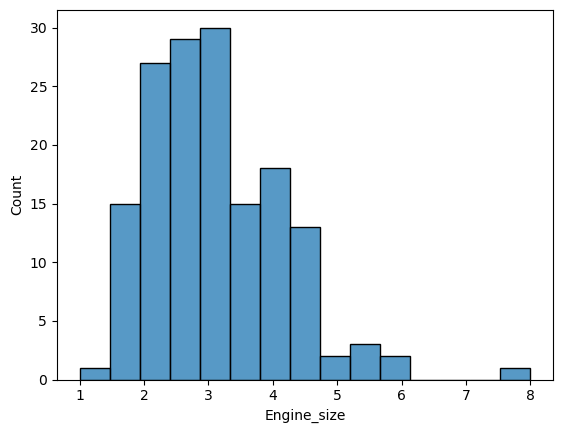

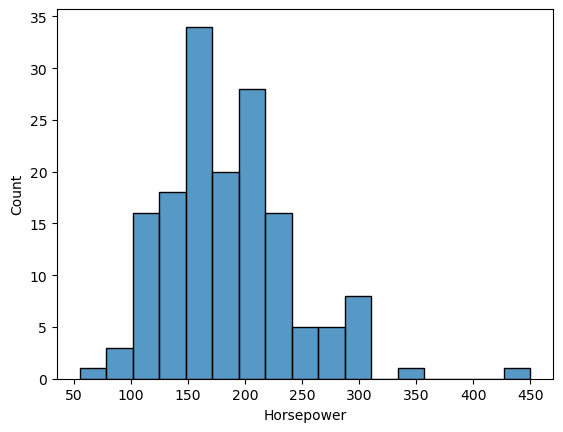

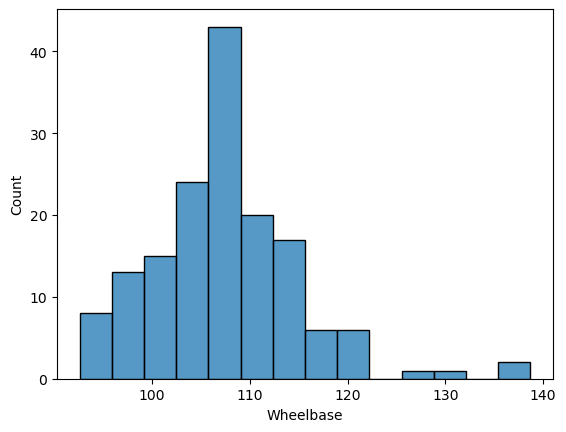

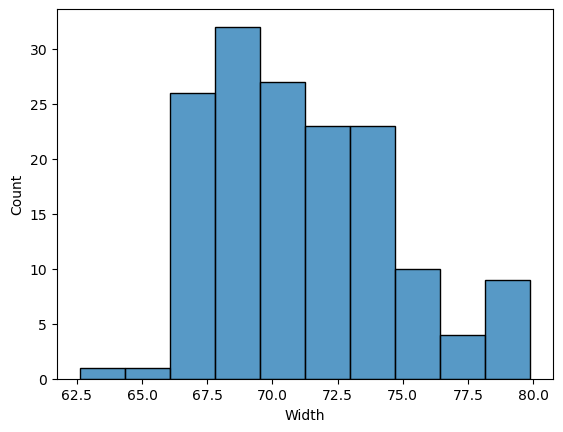

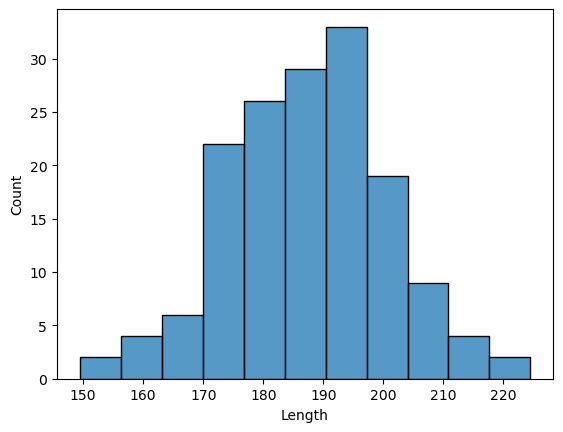

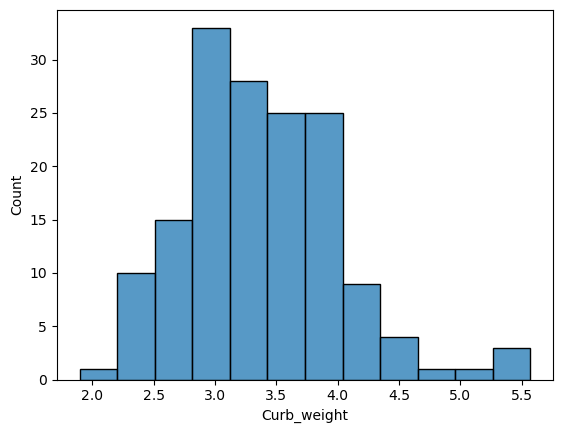

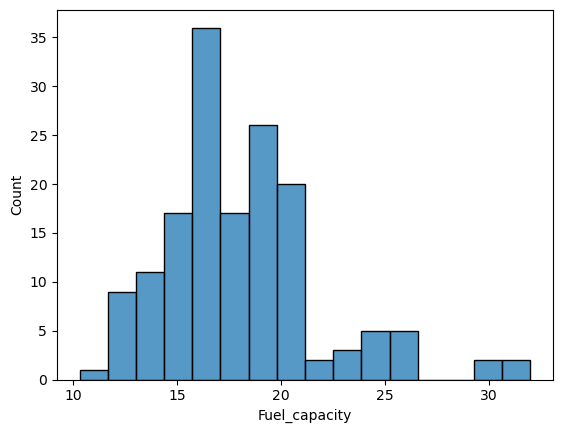

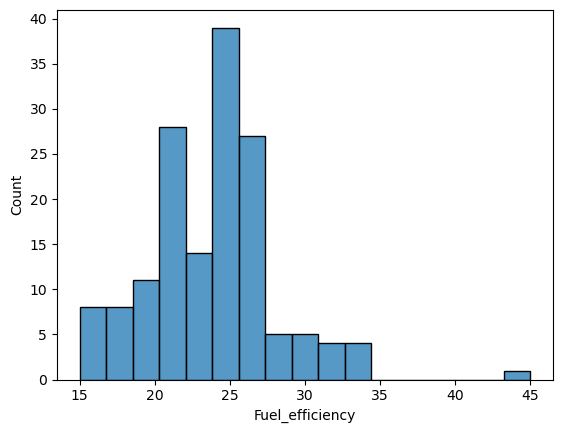

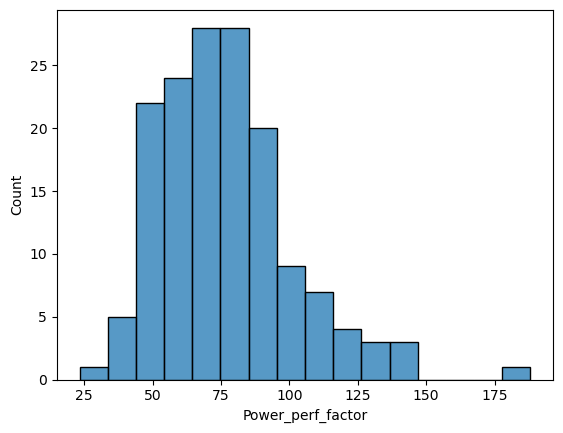

In [7]:
for i in data.columns:
    if data[i].dtypes !="object":
        sns.histplot(x=data[i])
        plt.show()

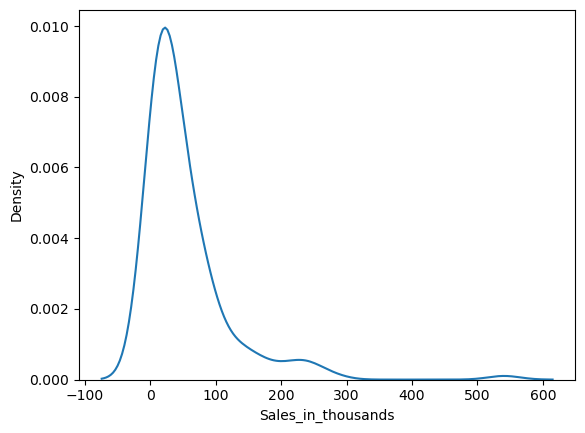

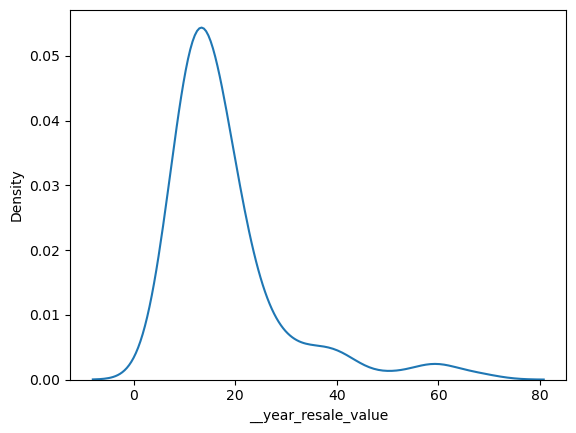

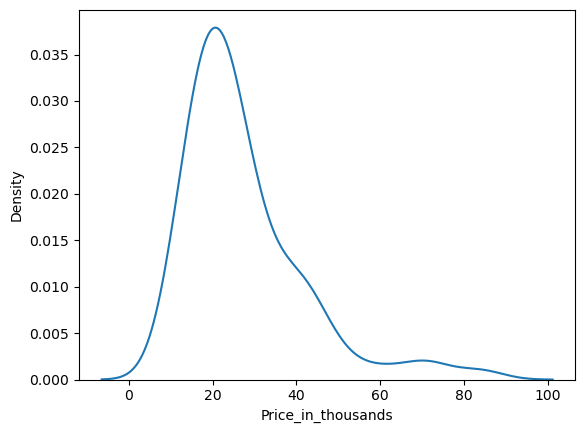

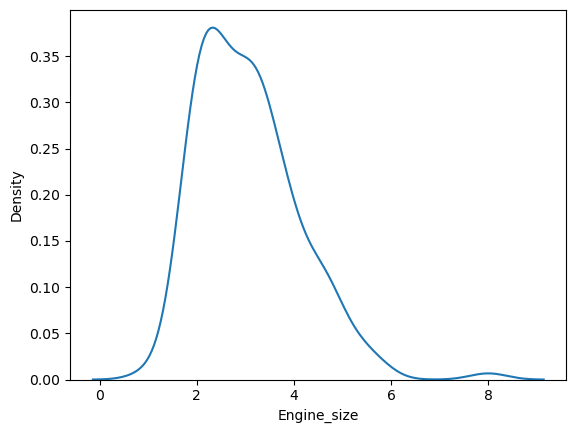

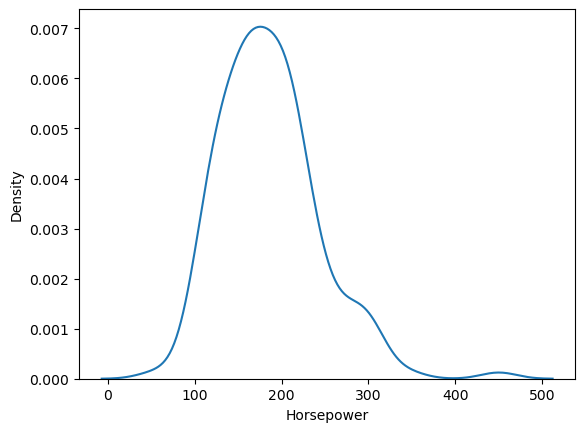

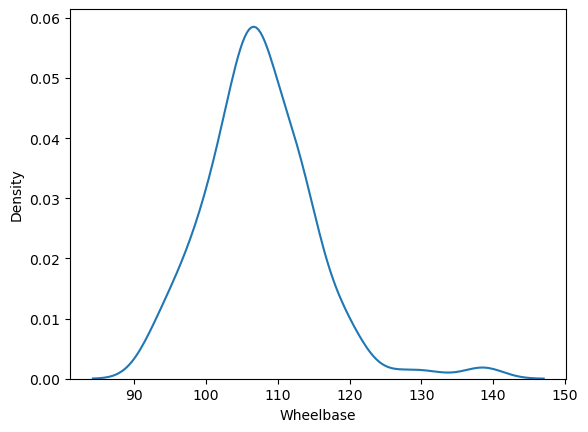

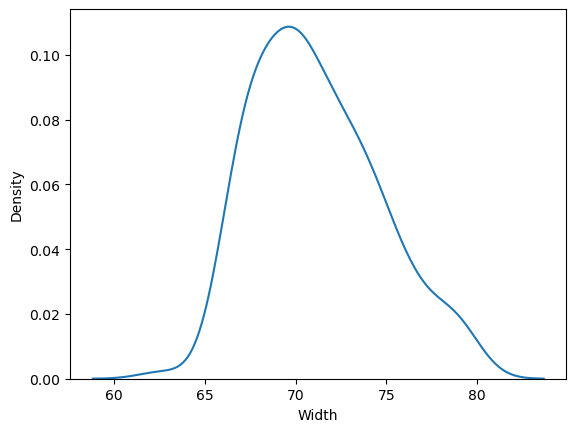

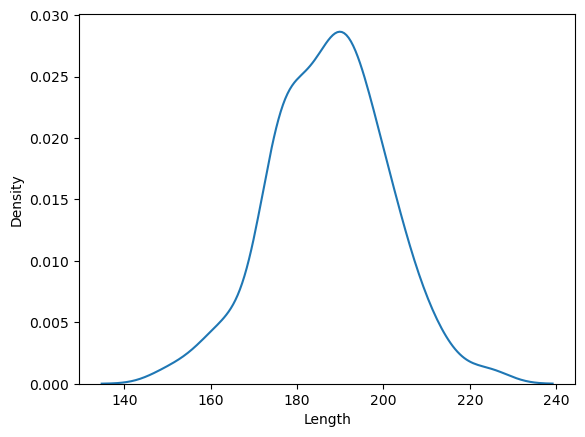

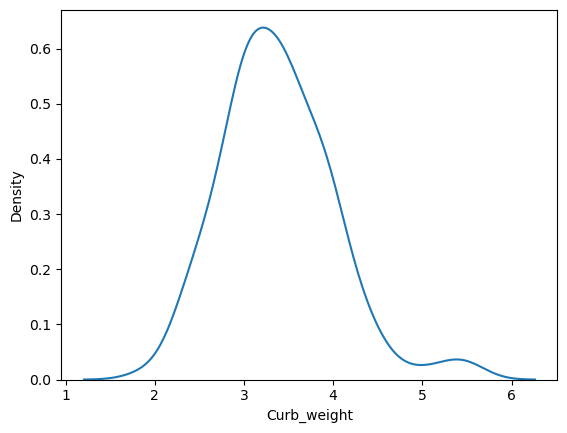

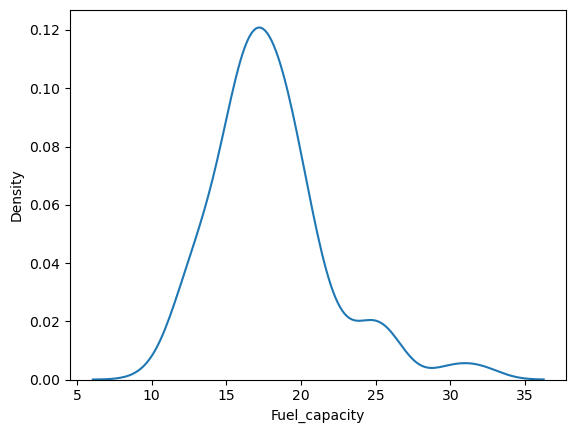

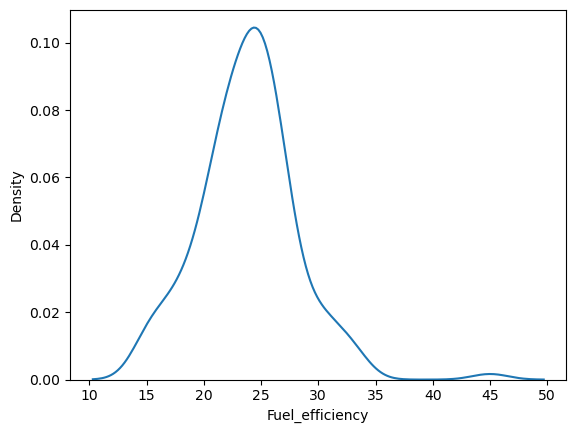

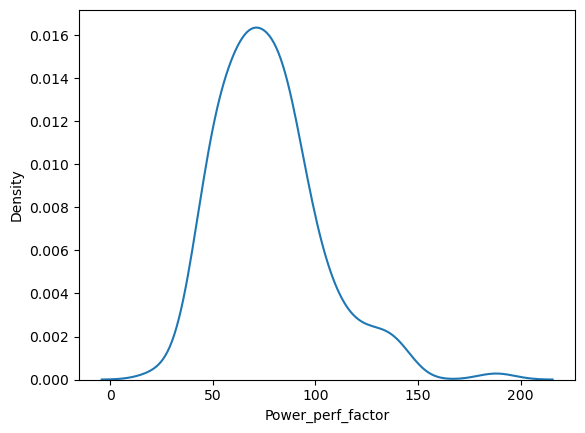

In [8]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.kdeplot(x=data[i])
        plt.show()

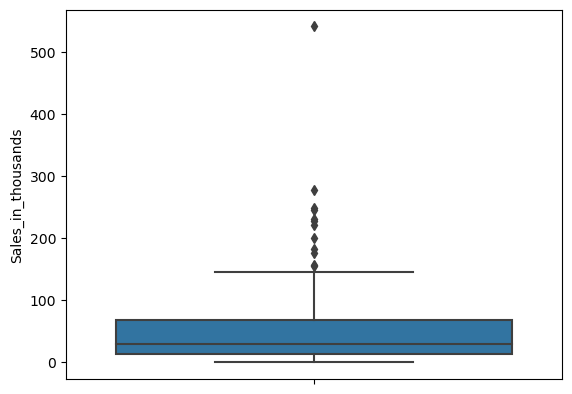

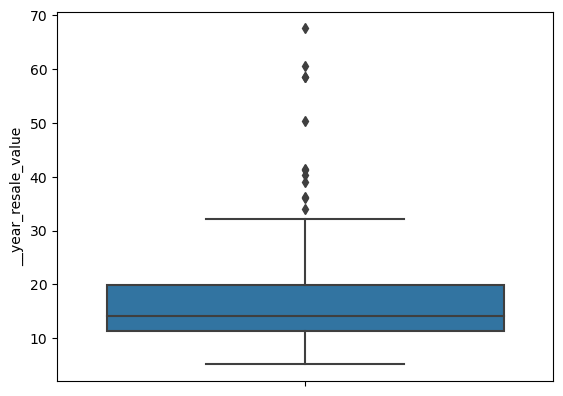

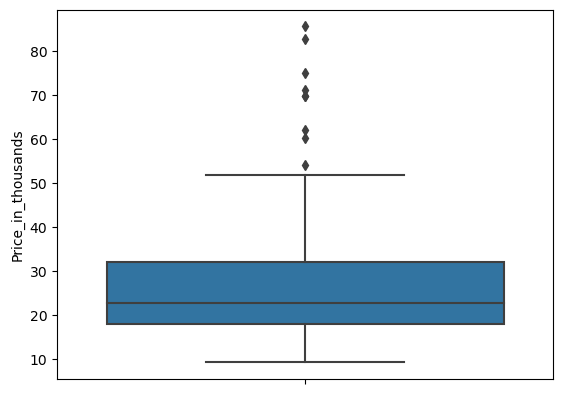

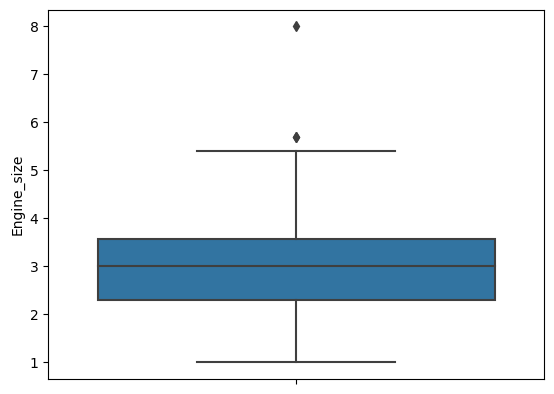

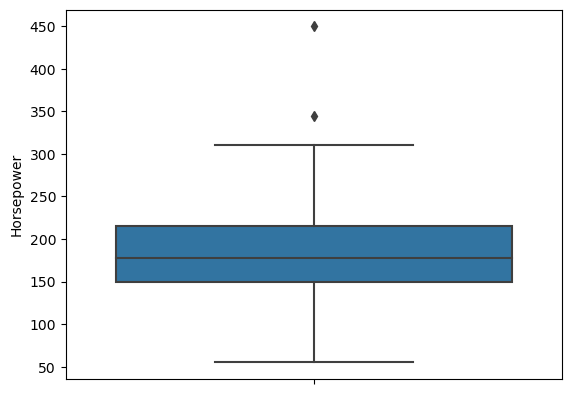

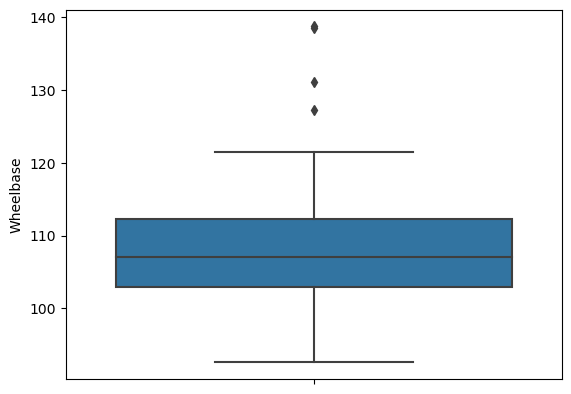

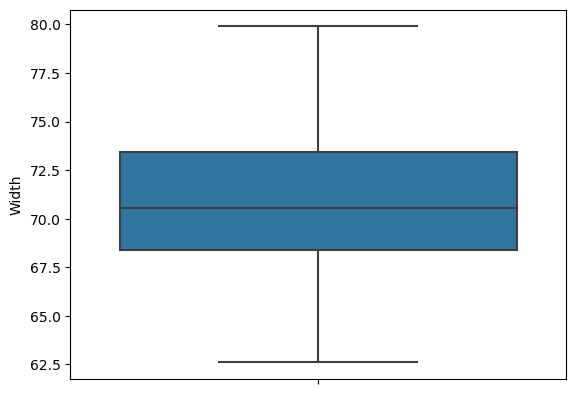

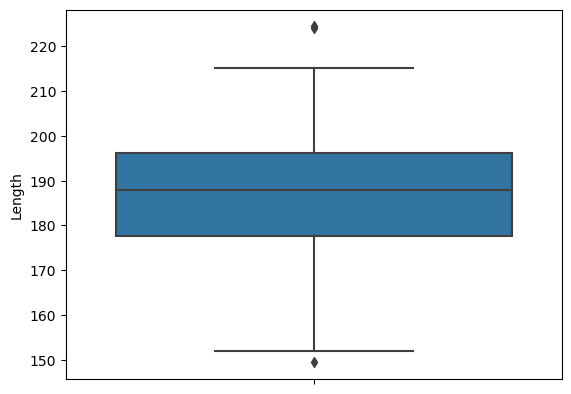

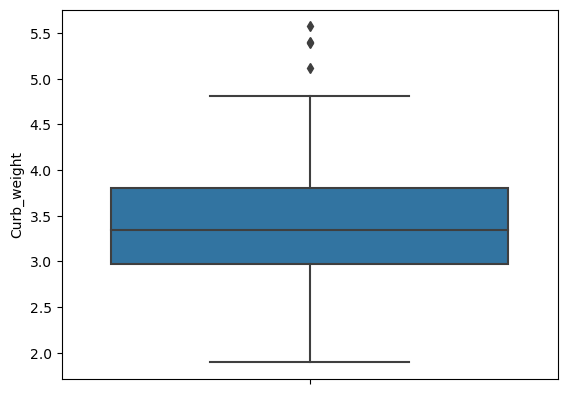

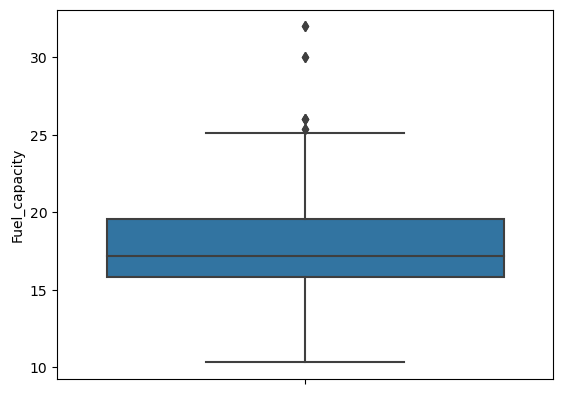

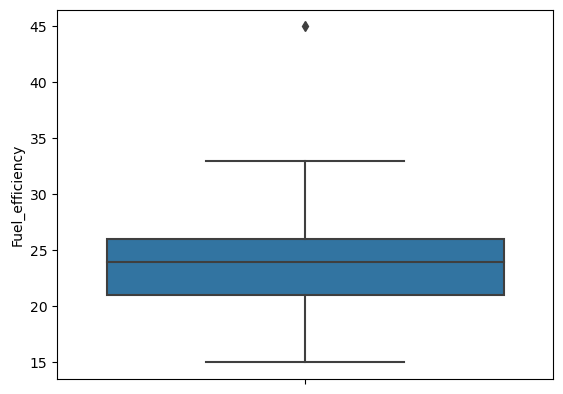

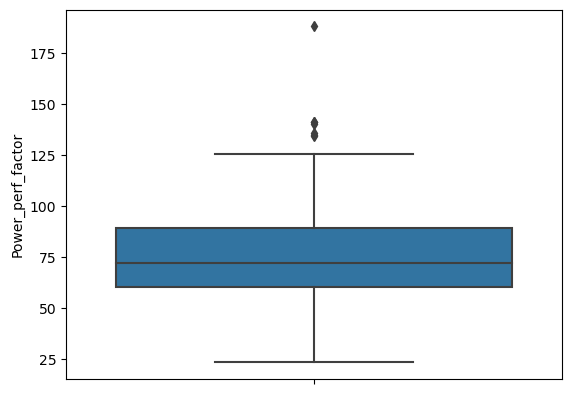

In [9]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.boxplot(y=data[i])
        plt.show()

In [49]:
def outlier_limit(col):
    Q1,Q3 = np.nanpercentile(col,[25,75])
    IQR =Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1 - 1.5*IQR
    return LL,UL
    

In [50]:
LL,UL = outlier_limit(data['Sales_in_thousands'])
data['Sales_in_thousands'] = np.where((data['Sales_in_thousands']>UL)|(data['Sales_in_thousands']<LL),np.nan,data['Sales_in_thousands'])

In [51]:
LL,UL = outlier_limit(data['__year_resale_value'])
data['__year_resale_value'] = np.where((data['__year_resale_value']>UL)|(data['__year_resale_value']<LL),np.nan,data['__year_resale_value'])

In [52]:
LL,UL = outlier_limit(data['Price_in_thousands'])
data['Price_in_thousands'] = np.where((data['Price_in_thousands']>UL)|(data['Price_in_thousands']<LL),np.nan,data['Price_in_thousands'])

In [53]:
LL,UL = outlier_limit(data['Engine_size'])
data['Engine_size'] = np.where((data['Engine_size']>UL)|(data['Engine_size']<LL),np.nan,data['Engine_size'])

In [54]:
LL,UL = outlier_limit(data['Horsepower'])
data['Horsepower'] = np.where((data['Horsepower']>UL)|(data['Horsepower']<LL),np.nan,data['Horsepower'])

In [55]:
LL,UL = outlier_limit(data['Wheelbase'])
data['Wheelbase'] = np.where((data['Wheelbase']>UL)|(data['Wheelbase']<LL),np.nan,data['Wheelbase'])

In [56]:
LL,UL = outlier_limit(data['Length'])
data['Length'] = np.where((data['Length']>UL)|(data['Length']<LL),np.nan,data['Length'])

In [57]:
LL,UL = outlier_limit(data['Curb_weight'])
data['Curb_weight'] = np.where((data['Curb_weight']>UL)|(data['Curb_weight']<LL),np.nan,data['Curb_weight'])

In [58]:
LL,UL = outlier_limit(data['Fuel_capacity'])
data['Fuel_capacity'] = np.where((data['Fuel_capacity']>UL)|(data['Fuel_capacity']<LL),np.nan,data['Fuel_capacity'])

In [59]:
LL,UL = outlier_limit(data['Fuel_efficiency'])
data['Fuel_efficiency'] = np.where((data['Fuel_efficiency']>UL)|(data['Fuel_efficiency']<LL),np.nan,data['Fuel_efficiency'])

In [60]:
LL,UL = outlier_limit(data['Power_perf_factor'])
data['Power_perf_factor'] = np.where((data['Power_perf_factor']>UL)|(data['Power_perf_factor']<LL),np.nan,data['Power_perf_factor'])

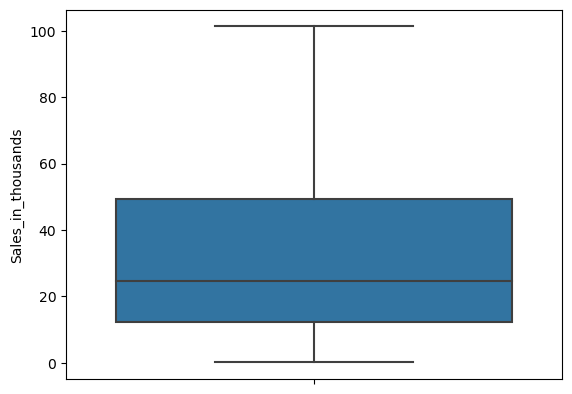

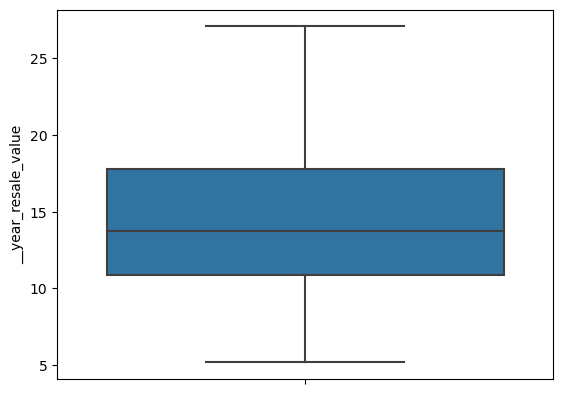

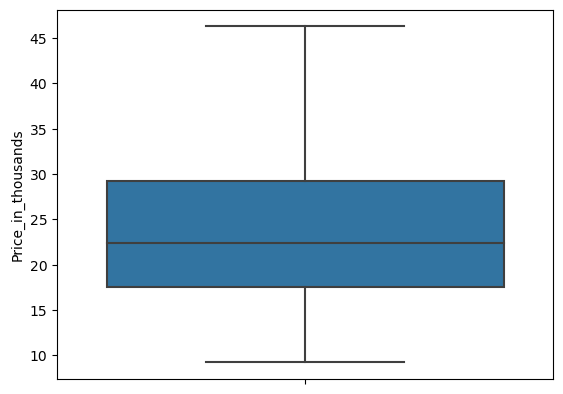

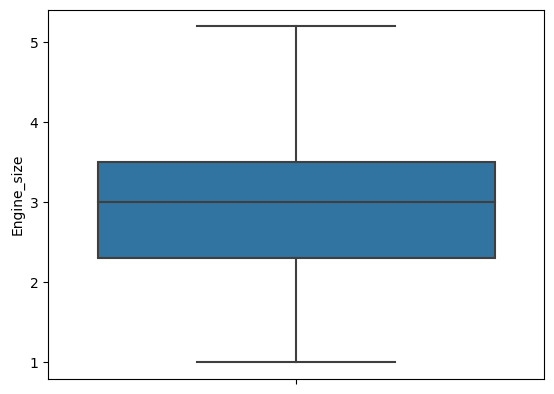

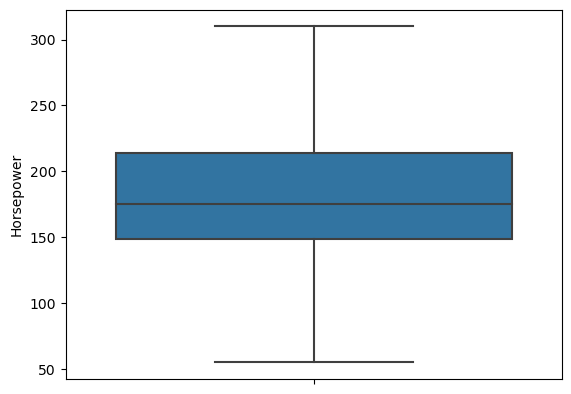

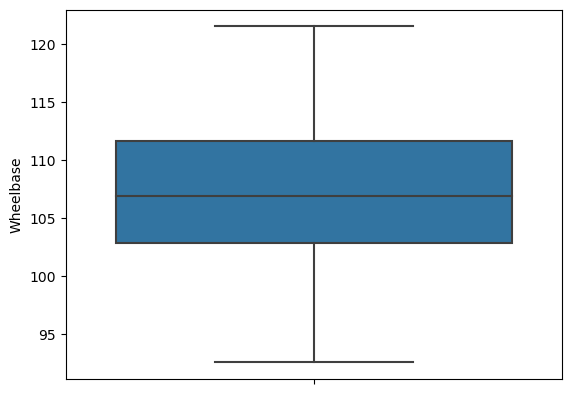

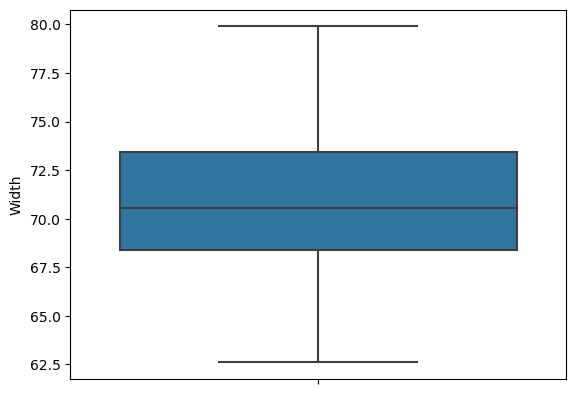

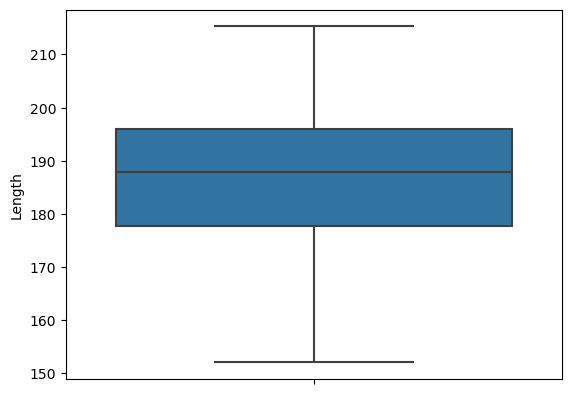

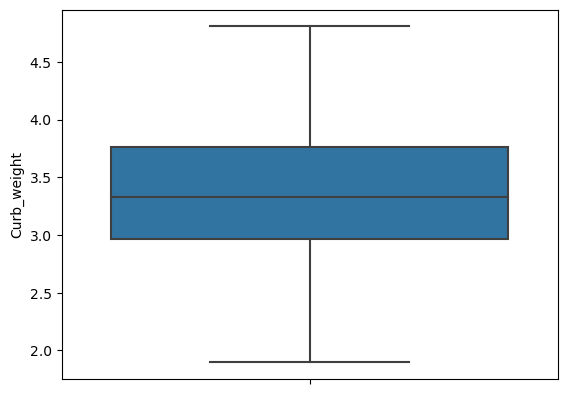

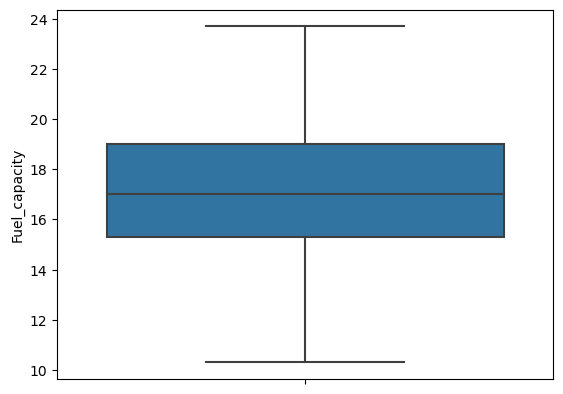

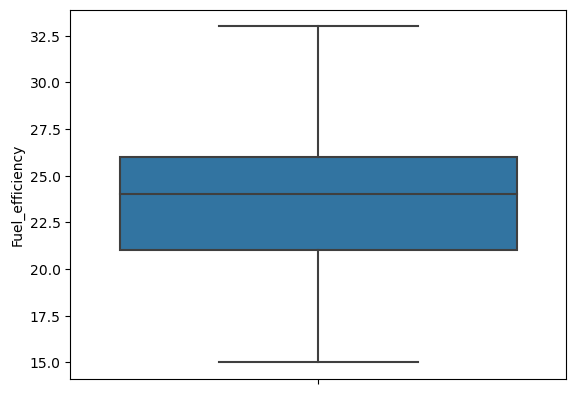

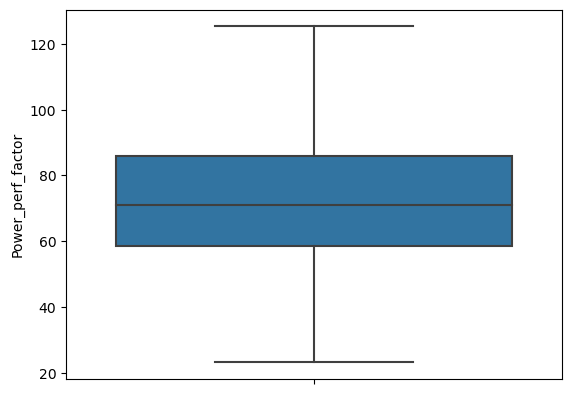

In [61]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.boxplot(y=data[i])
        plt.show()

In [97]:
data.dropna(inplace=True)

In [98]:
data.isnull().mean()*100

Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

In [99]:
NA = ["Sales_in_thousands","__year_resale_value","Price_in_thousands","Engine_size","Horsepower","Wheelbase" ,"Length","Curb_weight","Fuel_capacity", "Fuel_efficiency","Power_perf_factor"]    

In [100]:
for i in NA:
    data[i].fillna(data[i].mean(),inplace=True)

In [101]:
data.isnull().mean()*100

Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

In [102]:
le = LabelEncoder()

In [103]:
data['Manufacturer'] = le.fit_transform(data['Manufacturer'])

In [104]:
data['Model'] = le.fit_transform(data['Model'])

In [105]:
data['Vehicle_type'] = le.fit_transform(data['Vehicle_type'])

In [106]:
data['Latest_Launch'] = le.fit_transform(data['Latest_Launch'])

<Axes: >

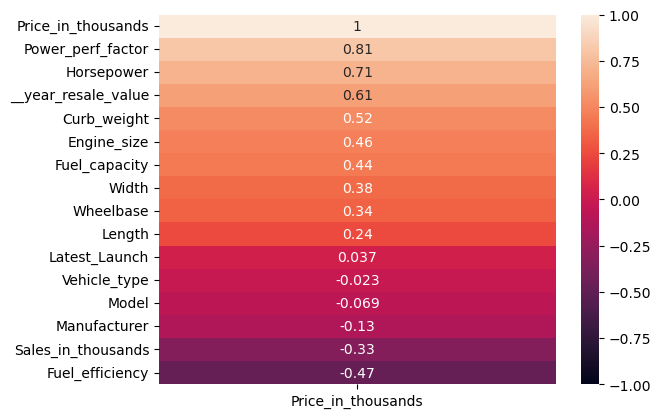

In [107]:
sns.heatmap(data.corr()[['Price_in_thousands']].sort_values(by ='Price_in_thousands',ascending=False),vmin=-1,vmax=1,annot=True)

In [108]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [109]:
x=data.iloc[:,[7,-1]].values
y=data.iloc[:,[5]].values

In [110]:
x = data[['Power_perf_factor','Horsepower','__year_resale_value','Curb_weight']].values

In [111]:
y = data[['Price_in_thousands']].values

In [112]:
sc=StandardScaler()

In [113]:
x = sc.fit_transform(x)

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=500,shuffle=True)

In [115]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [116]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ",training_score)
    print("testing_score: ",testing_score)
    print("mae: ",mae)
    print("mse: ",mse)
    print("rmse_test: ",rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  75.41926038144152
training_score:  68.23221242105132
testing_score:  75.41926038144152
mae:  3.073802778196245
mse:  19.30550248455748
rmse_test:  4.393802736190768
****************************************************************************************************
model trained with Ridge
r2score:  75.30506791032433
training_score:  68.21448862004478
testing_score:  75.30506791032433
mae:  3.084794769942311
mse:  19.39518827388199
rmse_test:  4.403996852165314
****************************************************************************************************
model trained with LinearSVR
r2score:  66.84429724306278
training_score:  58.73829113124018
testing_score:  66.84429724306278
mae:  3.517517629260881
mse:  26.04020513150197
rmse_test:  5.102960428173235
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  55.466708802055955
training_sco

In [117]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('cross validation model:{}'.format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print('Average rmse: ',rmse_average)
    print('*'*100)

cross validation model:LinearRegression
Average rmse:  4.817692615034884
****************************************************************************************************
cross validation model:Ridge
Average rmse:  4.815297168718946
****************************************************************************************************
cross validation model:LinearSVR
Average rmse:  5.241790449985191
****************************************************************************************************
cross validation model:DecisionTreeRegressor
Average rmse:  5.389933331056726
****************************************************************************************************
cross validation model:GradientBoostingRegressor
Average rmse:  4.56509895379043
****************************************************************************************************
cross validation model:AdaBoostRegressor
Average rmse:  5.025940800376487
*************************************************************

#### We can see that 'RandomForestRegressor' is having the best overall performance so far. We may proceed with it.

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=500,shuffle=True)

In [119]:
model = RandomForestRegressor()

In [120]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [121]:
y_pred = model.predict(x_test)

In [122]:
r2_score(y_test,y_pred)

0.8073954288039275

#### Testing the accuracy

In [123]:
model.score(x_test,y_test)

0.8073954288039275

#### Training accuracy

In [124]:
model.score(x_train,y_train)

0.9517934355841092

#### MAE

In [125]:
mean_absolute_error(y_test,y_pred)

2.853044687499997

#### MSE

In [126]:
mean_squared_error(y_test,y_pred)

15.126998151656773

#### Root Mean Squared Error

In [127]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.889344180148727

In [128]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [129]:
y_pred = model.predict(x_test)

#### Creating a dataframe with y_test and y_pred

In [130]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['actual','prediction'],dtype=float)

In [131]:
Output.head()

,actual,prediction
0,39.665,38.485868
1,17.518,16.493670
2,19.990,17.660250
3,36.000,28.902460
4,20.390,18.232290


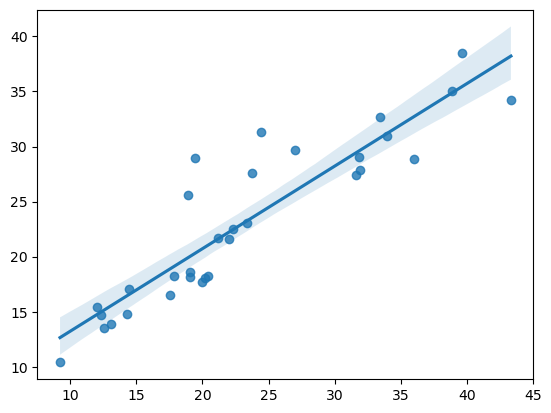

In [132]:
sns.regplot(x=y_test,y=y_pred)
plt.show()